In [1]:
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import SimParams, OptimizationParameters
from act.cell_model import TargetCell, ModuleParameters

target_cell = TargetCell(
    hoc_file="/home/mwsrgf/proj/ACT/data/Passive/orig/template.hoc",
    mod_folder="/home/mwsrgf/proj/ACT/data/Passive/orig/modfiles/",
    cell_name="Test_Spiker",
    g_names = ["gbar_leak"]
)

sg_passive = SyntheticGenerator(
    ModuleParameters(
        module_folder_name="passive_orig",
        cell= target_cell,
        sim_params= SimParams(
            h_v_init = -70,
            h_tstop = 1000,
            h_dt = 0.01,
            h_celsius = 31,
            CI_type = "constant",
            CI_amps = [-0.1],    ##################### NEGATIVE CURRENT INJECTION ###################
            CI_dur = 800,
            CI_delay = 100,
            set_g_to=None
        ),
        optim_params = OptimizationParameters(
            blocked_channels= []
        )
    )
)

sg_passive.generate_synthetic_target_data("passive_data.csv")

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


Blocking: []
Total number of jobs: 1
Total number of proccessors: 192
h.celsius: 31.0
h.tstop: 1000.0
h.dt: 0.01
h.steps_per_ms: 100.0
h.v_init: -70.0
inj.amp = -0.1 | inj.dur = 800 | inj.delay = 100
Capacitance (cm) of soma: 2.5
Leak Conductance (Mho/cm^2) of soma: 5.5e-05
Leak Reversal (mV) of soma: -70.0
Found 1 section(s) in this cell. Calculating the total surface area of the cell.
Cell Area (cm^2) of soma: 1.1103645074847766e-05
/home/mwsrgf/proj/ACT/model/passive_orig/synthetic_-0.1_


(100000,)


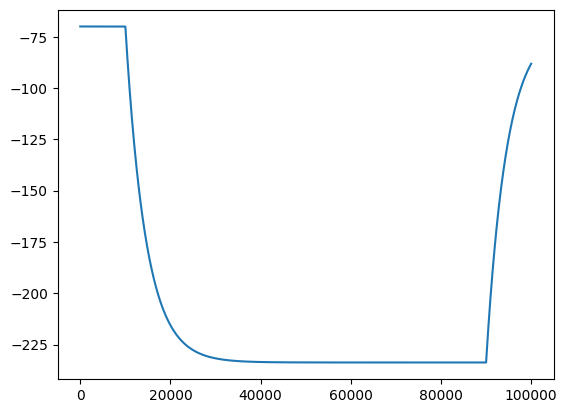

In [2]:
import numpy as np
dataset = np.loadtxt('./model/passive_orig/target/passive_data.csv', delimiter=',', skiprows=1)

V = dataset[:,0]
print(V.shape)

from matplotlib import pyplot as plt

plt.plot(V)

(100000,)


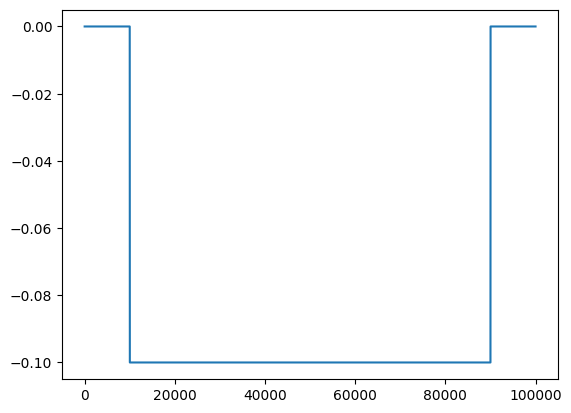

In [3]:
import numpy as np
dataset = np.loadtxt('./model/passive_orig/target/passive_data.csv', delimiter=',', skiprows=1)

I = dataset[:,1]
print(I.shape)

from matplotlib import pyplot as plt

plt.plot(I)

In [4]:
from act.PassivePropertiesModule import PassivePropertiesModule
from act.act_types import SimParams
from act.cell_model import TrainCell


train_cell = TargetCell(
    hoc_file="/home/mwsrgf/proj/ACT/data/Passive/orig/template.hoc",
    mod_folder="/home/mwsrgf/proj/ACT/data/Passive/orig",
    cell_name="Test_Spiker",
    g_names = ["gbar_leak"]
)

passive_mod = PassivePropertiesModule(
    train_cell=train_cell,
    sim_params=SimParams(
            h_v_init = -70,
            h_tstop = 1000,
            h_dt = 0.01,
            h_celsius = 6.3,
            CI_type = "constant",
            CI_amps = [-0.1],    ##################### NEGATIVE CURRENT INJECTION ###################
            CI_dur = 800,
            CI_delay = 100,
            set_g_to=[]
        ),
    trace_filepath='./model/passive_orig/target/passive_data.csv',
    leak_conductance_variable="gbar_leak",
    leak_reversal_variable="eleak_leak"
)

In [5]:
passive_mod.set_passive_properties()
print(train_cell.passive_properties)

MECHANISMS already loaded.
Found 1 section(s) in this cell. Calculating the total surface area of the cell.
tau: 45.45
r_in: 1637.4638819294846
g_leak: 0.0006107004930219668
PassiveProperties(V_rest=-70.0, R_in=1637.4638819294846, tau=45.45, Cm=2.4997500569180375, g_bar_leak=5.500000125232207e-05, cell_area=1.1103645074847766e-05, leak_conductance_variable='gbar_leak', leak_reversal_variable='eleak_leak')
